<CENTER>
</br>
<p><font size="5"> TAR: Taller de Aprendizaje por Refuerzo 2025</span></p>
<p><font size="5">  LAB 1: MDP</font></p>
</p></br>
</p>
</CENTER>


----------------------------

In this lab we are going to go through the fundamental concepts of MDP, state and solve a problem for optimal machine replacement, relying on the algorithms seen in class, and no particular MDP python library other than regular ones such as numpy, random, matplotlib.

## Machine replacement

A machine has possible states in $\{1,\ldots,S\}$ that represent how good it performs (the higher the better), state 1 can be consider as broken, state S as new. At each instant $k=0,\ldots$ either the machine is replaced (action $a=1$) or it is left unchanged (action $a=2$). We assume that

\begin{equation}
\begin{array}{ll}
P(s_{k+1}=S|a_k=1) &=1\\
P(s_{k+1}=s|s_k=s\_ ,a_k=2) &=(1-\theta)\delta_{s\_ ,s}+\theta \delta_{\max(1,s\_-1 ),s}.
\end{array}
\end{equation}

where $\delta_{a,b}=1$ if $a=b$ and $0$ otherwise.

**1)** Explain the meaning of these probabilities.

**2)** Give the expression of transition matrices $P(1)$ and $P(2)$ corresponding to actions $a_k=1$ and $a_k=2$.

At times $k=0,\ldots$, the cost of machine replacement is $c_k(s,a=1)=C$, while if the machine is not replaced, there is still a cost given by $c_k(s,a=2)=(S-s)/(S-1)$, due to the loss of quantity/quality of the production of the machine when its state degrades.

**3)** Implement the trajectory of the MDP for a given policy $\pi$ in a function *trajectory(pi=$\pi$)* that outputs the trajectory of the state $s$, the trajectory of the action $a$ and resulting cumulative cost $J$.

**4)** Implement a plotting function  *plot_trajectory(pi=$\pi$,policy='')* that runs the *trajectory* function for policy $\pi$ and plots the trajectories of $s$ and $a$ and gives the value of cumulative cost $J$. The policy string represents the legend in the plot.

**5)** Express Bellman's value iteration algorithm. Implement the algorithm for $S=100$, $\theta=.5$, $C=100$ and discount factor $\gamma$ as a parameter.  

**6)** For the optimal policy, plot a few trajectories of the MDP. Test the influence of parameters $\theta$, $C$, $\gamma$... Comments?


------------

1) 
La ecuación $ P(s_{k+1}=S|a_k=1) =1 $ implica que al tomar la acción $a=1$ en el instante $k$ el próximo estado es $S$ con una probabilidad de 1. Es decir, la máquina pasa a estado _nuevo_

Por otro lado, la ecuación $ P(s_{k+1}=s|s_k=s\_ ,a_k=2) =(1-\theta)\delta_{s\_ ,s}+\theta \delta_{\max(1,s\_-1 ),s} $ se puede descomponer en sus dos términos. El primer término refiere a la probabilidad de mantenerse en el mismo estado, es decir $s\_ = s$, lo cual sucede con una probabilidad $1-\theta$. El segundo término es la probabilidad de cambiar de estado, en este caso a uno más roto, hasta llegar al 1 que es el más roto, esto ocurre con probabilidad $\theta$. 

2)
La accion 1 lleva de forma deterministica el estado $s_k$ al estado $S$, independientemente del valor de $s_k$. Por lo tanto:

$$
P(1) = \begin{bmatrix}
0 & 0 & \cdots & 0 & 1 \\
0 & 0 & \cdots & 0 & 1 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \cdots & 0 & 1 \\
0 & 0 & \cdots & 0 & 1
\end{bmatrix}_{S \times S}
$$

Para la accion 2, hay una probabilidad $1-\theta$ de mantenerse en el mismo estado y $\theta$ de ir a un estado uno menor. En el caso del estado 1 solo se va a si mismo.

$$
P(2) = \begin{bmatrix}
1 & 0 & \cdots & 0 & 0 \\
\theta & 1-\theta & \cdots & 0 & 0 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \cdots & 1-\theta & 0 \\
0 & 0 & \cdots & \theta & 1-\theta
\end{bmatrix}_{S \times S}
$$

3.

In [18]:
from typing import  Callable
import numpy as np

s0 = 10
T = 100
S = 100
theta = 0.5
pi = np.ones(S, dtype=int) + 1
pi[1] = 1 
C = 100

def trajectory(pi : Callable, s0: int, T: int, S: int, theta: float, C: float):
    """

    Args:
        pi (Callable): Funcion de politica, un mapeo de estados a acciones.
                       Recibe uno de {1, ..., S} y devuelve una accion en {1, 2}.
                       Forma (S,) donde S es el numero de estados.
        s0 (int): Estado inicial
        T (int): Cantidad de pasos a simular
        S (int): Cantidad de estados
        theta (float): Probabilidad de degradacion del estado
        C (float): Costo de reemplazo de maquina
    Returns:
        tuple: Trayectoria de estados, trayectoria de acciones, costo acumulado
    """
    assert pi.shape == (S,)
    assert pi.dtype == int
    
    assert np.all(np.isin(pi, [1, 2]))

    s = np.zeros(T, dtype=int)
    a = np.zeros(T-1, dtype=int)
    J = 0
    s[0] = s0
    for t in range(T-1):
        a[t] = pi[s[t]-1]
        if a[t] == 1:
            s[t+1] = S
            J += C
        elif a[t] == 2:
            if s[t] == 1:
                s[t+1] = 1
            else:
                choices = np.array([s[t]-1, s[t]])
                probs = np.array([theta, 1-theta])
                s[t+1] = np.random.choice(choices, p=probs)
                J += (S-s[t])/(S-1)
        else:
            raise ValueError(f"Invalid action: {a[t]}")
        
    return s, a, J

s,a, j = trajectory(pi=pi, s0=s0, T=T, S=S, theta=theta, C=C)
print(f"State trajectory: {s}")
print(f"Action trajectory: {a}")
print(f"Cumulative cost: {j}")

State trajectory: [ 10  10   9   9   9   9   8   7   7   7   6   5   5   5   4   4   4   3
   2 100 100 100 100 100  99  99  99  98  97  96  96  96  96  96  95  94
  94  94  93  93  92  91  90  90  89  89  89  88  87  86  86  86  85  84
  84  84  83  82  82  81  81  80  79  79  79  78  77  76  75  75  75  74
  73  73  72  72  72  71  70  69  68  67  67  67  67  66  66  66  66  66
  65  64  64  63  63  63  62  62  61  61]
Action trajectory: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Cumulative cost: 132.1515151515153


4.

El costo acumulado para la politica Reemplazar en estado 1 es 128.02020202020208


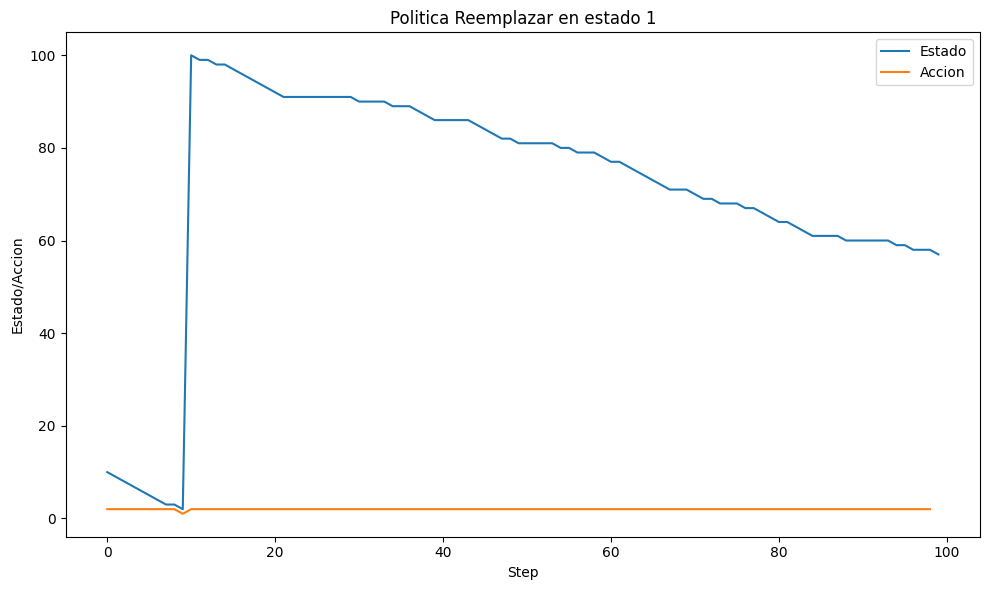

In [19]:
import matplotlib.pyplot as plt
def plot_trajectories(pi : np.ndarray, policy: str, T: int, S: int, theta: float, C: float):
    """Grafica las trayectorias de estado y accion para una politica dada.

    Args:
        pi (np.ndarray): Politica que mapea estados a acciones.
                        Forma (S+1,) donde S es el numero de estados.
                        Mapea {1, ..., S} a {1, 2}
        policy (str): Nombre de la politica para etiquetar el grafico.
        T (int): Cantidad de pasos a simular.
        S (int): Cantidad de estados.
        theta (float): Probabilidad de degradacion del estado.
        C (float): Costo de reemplazo de la maquina.
    """    
    s, a, J = trajectory(pi, s0, T, S, theta, C)
    print(f"El costo acumulado para la politica {policy} es {J}")
        
    fig = plt.figure(figsize=(10, 6))
    plt.plot(s, label='Estado')
    plt.plot(a, label='Accion')
    plt.legend()
    plt.title(f'Politica {policy}')
    plt.ylabel('Estado/Accion')
    plt.xlabel('Step')
    
    plt.tight_layout()
    plt.close()
    return fig
    
plot_trajectories(pi = pi, policy='Reemplazar en estado 1', T=T, S=S, theta=theta, C=C)


5.

El costo acumulado para la politica Optimal es 17.95959595959596


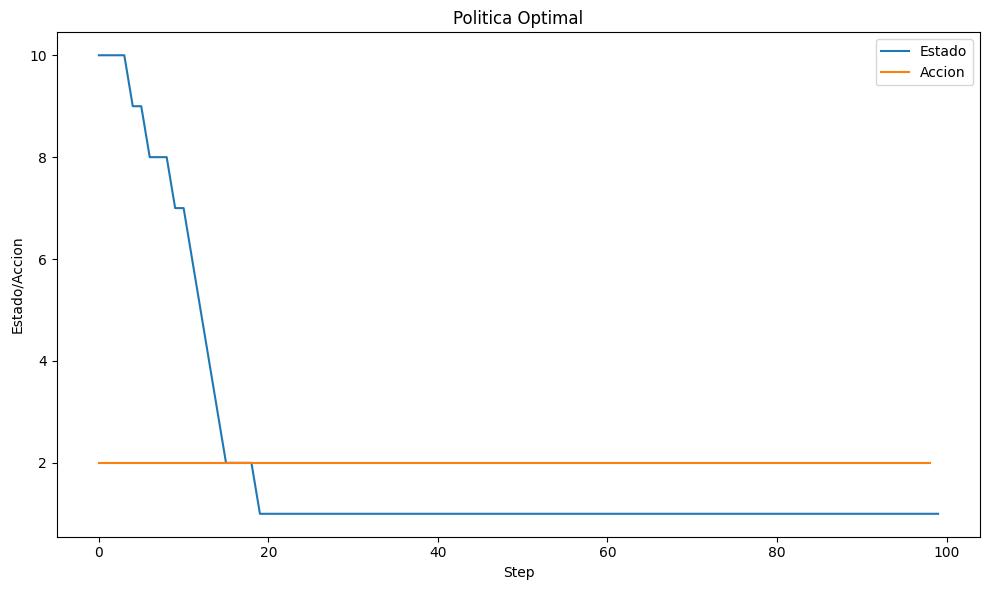

In [20]:
def value_iteration(S, theta, C, gamma, max_iter=1000, tol=1e-6):
    """
    Implementa el algoritmo de iteracion de valor de Bellman para el problema de reemplazo de maquinas.
    
    Parametros:
    -----------
    S : int
        Numero de estados posibles para la maquina (1 a S).
    theta : float
        Parametro de probabilidad para la transicion de estado cuando la maquina no se reemplaza.
    C : float
        Costo de reemplazo de la maquina.
    gamma : float
        Factor de descuento para costos futuros.
    max_iter : int
        Numero maximo de iteraciones.
    tol : float
        Tolerancia para la convergencia.
    Retorna:
    --------
    V : ndarray
        Funcion de valor optima para cada estado.
    pi : ndarray
        Politica optima para cada estado (1 = reemplazar, 2 = mantener).
    """
    V = np.zeros(S)
    pi = np.zeros(S, dtype=int)

    for _ in range(max_iter):
        for s in range(S):
            # Calculamos la reward como menos el costo
            r = [-C, -(S - (s + 1)) / (S - 1)]
            # a = 1:
            V_new_a1 = r[0] + gamma * V[S-1]
            # a = 2:
            V_new_a2 = ((1-theta) * (r[1] + gamma * V[s])) + (theta * (r[1] + gamma * V[max(1, s - 1)]))

            V_old = V[s]
            V[s] = max(V_new_a1, V_new_a2)

            pi[s] = np.argmax([V_new_a1, V_new_a2]) + 1
            if np.abs(V_old - V[s]) < tol:
                break

    return V, pi

gamma = 0.9

V, pi = value_iteration(S=S, theta=theta, C=C, gamma=gamma)

plot_trajectories(pi = pi, policy='Optimal', T=T, S=S, theta=theta, C=C)

Se ve como la política óptima en el caso donde el costo es $C=100$ es siempre mantener la máquina y nunca reemplazar. Esto se debe a que $c_k(s,a=1) >> 1 \geq c_k(s,a=1)$. Como se busca minimizar el costo (o maximizar menos el costo) la política óptima resulta en nunca reemplazar la máquina.

6

El costo acumulado para la politica C=0.01 gamma=0.1 es 0.37000000000000016
El costo acumulado para la politica C=0.01 gamma=0.5 es 0.2900000000000001
El costo acumulado para la politica C=0.01 gamma=0.9 es 0.3200000000000001
El costo acumulado para la politica C=0.1 gamma=0.1 es 4.116161616161614
El costo acumulado para la politica C=0.1 gamma=0.5 es 3.0232323232323224
El costo acumulado para la politica C=0.1 gamma=0.9 es 2.258585858585859
El costo acumulado para la politica C=1 gamma=0.1 es 22.070707070707066
El costo acumulado para la politica C=1 gamma=0.5 es 19.797979797979796
El costo acumulado para la politica C=1 gamma=0.9 es 9.909090909090907
El costo acumulado para la politica C=5 gamma=0.1 es 15.969696969696969
El costo acumulado para la politica C=5 gamma=0.5 es 10.383838383838384
El costo acumulado para la politica C=5 gamma=0.9 es 30.11111111111111


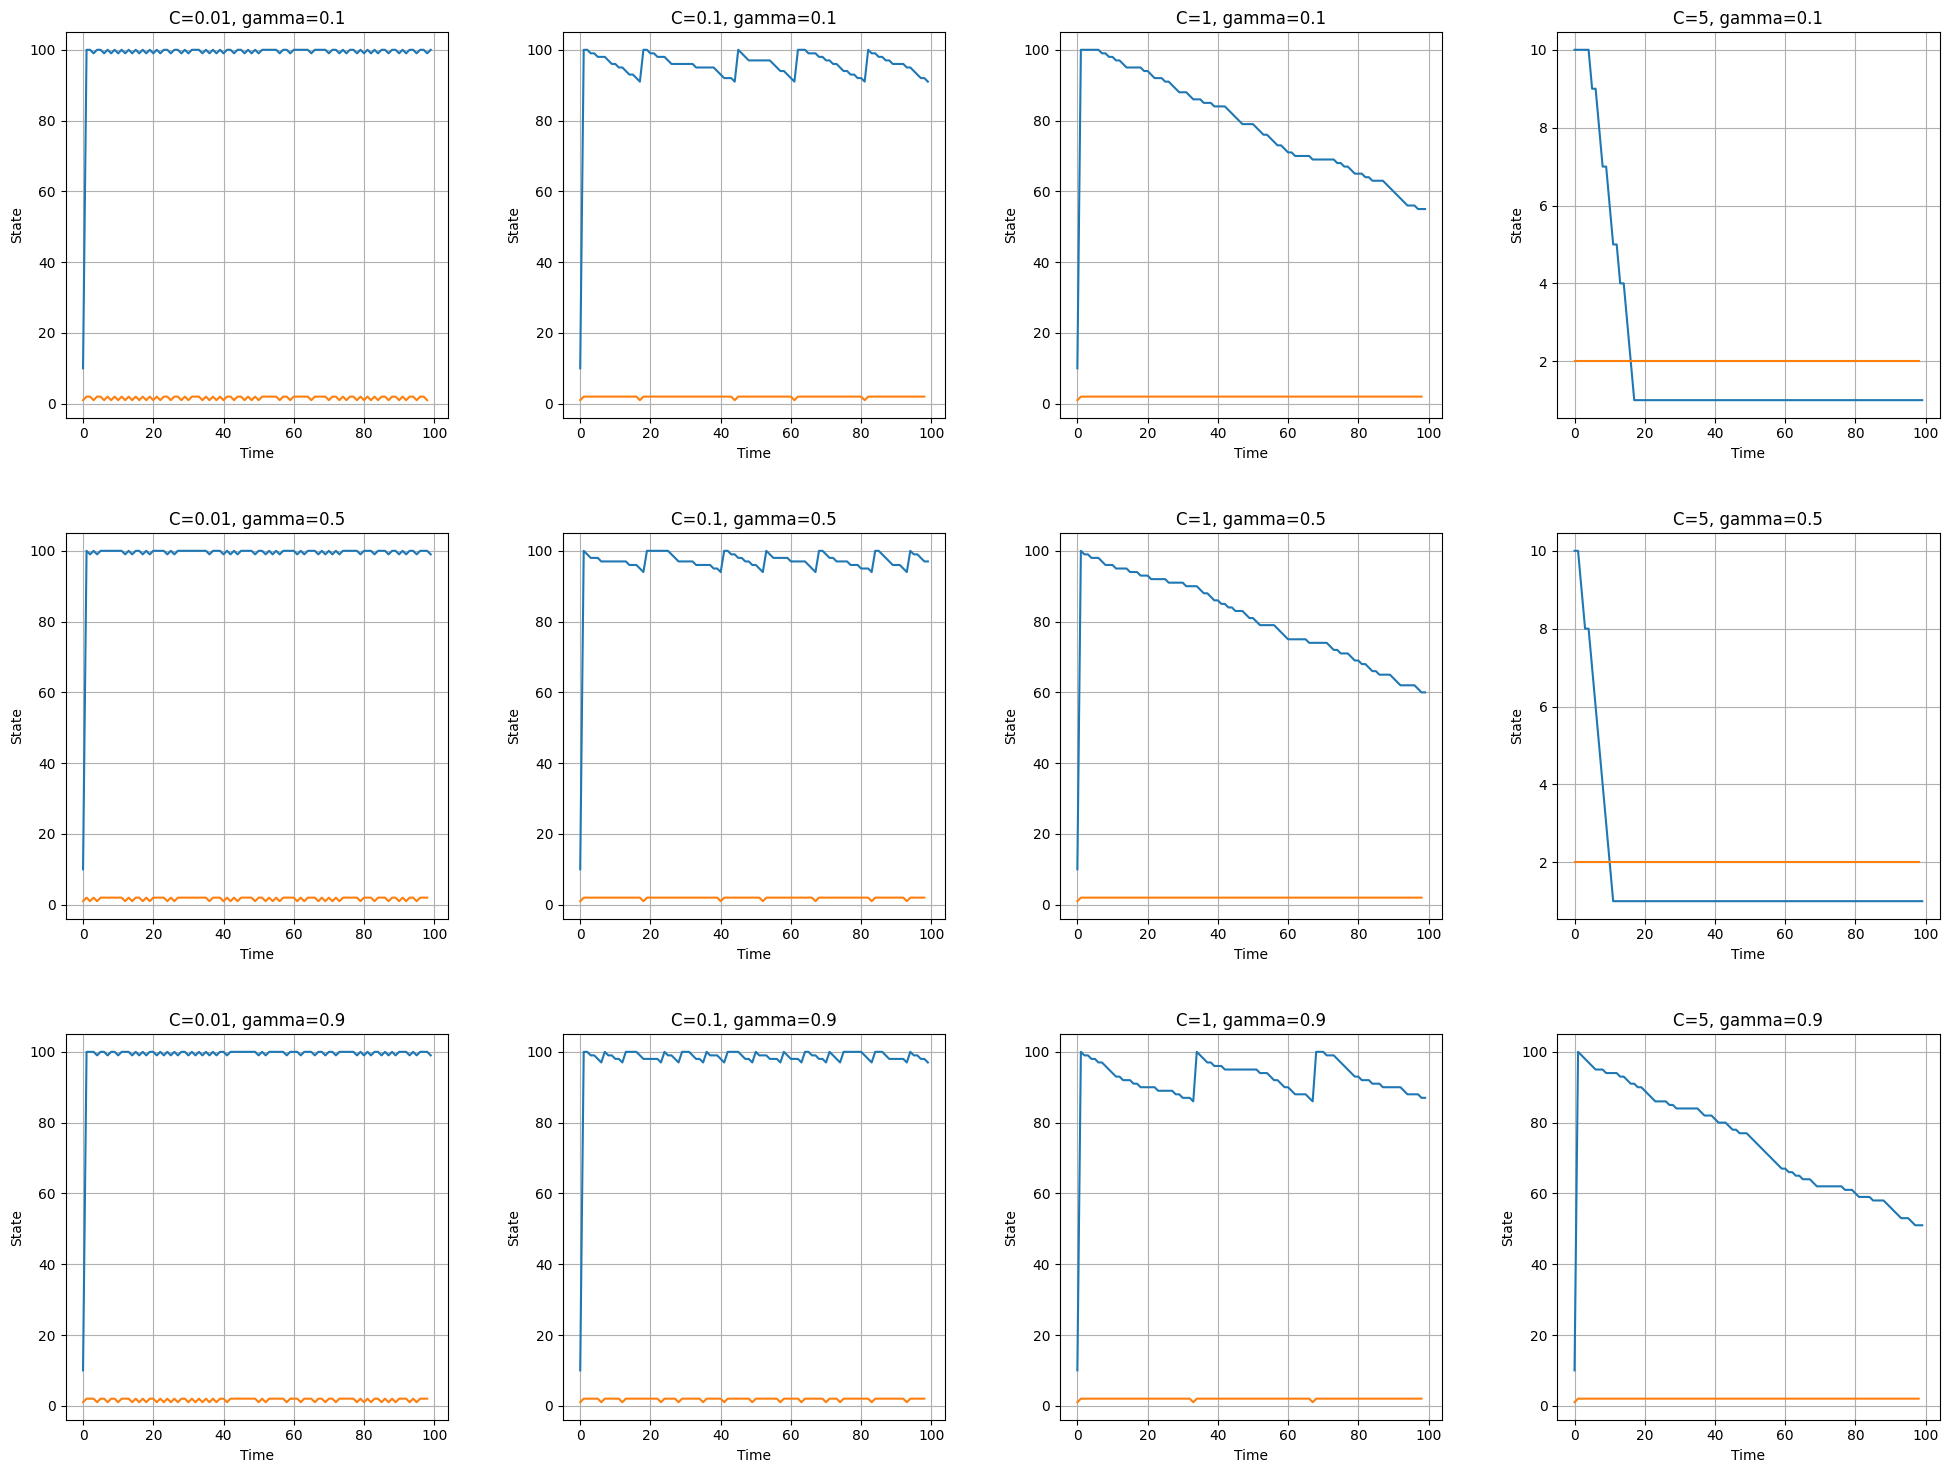

In [21]:
gammas = [0.1, 0.5, 0.9]
Cs = [0.01, 0.1, 1, 5]
S = 100
T = 100
theta = 0.5

Vs = []
pis = []
policies = []
figures = []

fig, axs = plt.subplots(3, 4, figsize=(20, 15))
fig.tight_layout(pad=3.0)

for i, C in enumerate(Cs):
    for j, gamma in enumerate(gammas):    
        V, pi = value_iteration(S=S, theta=theta, C=C, gamma=gamma)
        Vs.append(V)
        pis.append(pi)
        policies.append(f"C={C} gamma={gamma}")
        
        ax = axs[j, i]
        subfig = plot_trajectories(pi=pi, policy=f'C={C} gamma={gamma}', T=T, S=S, theta=theta, C=C)
        ax.clear()
        for line in subfig.axes[0].get_lines():
            ax.plot(line.get_xdata(), line.get_ydata(), color=line.get_color())
        ax.set_title(f'C={C}, gamma={gamma}')
        ax.set_xlabel('Time')
        ax.set_ylabel('State')
        ax.grid(True)

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()


A medida que el valor de $C$ aumenta, se observa cómo la máquina es reemplazada cada vez menos veces. Esto ocurre porque el costo de reemplazo se vuelve alto en comparación con el costo de mantenimiento. Cuando el costo de reemplazo es bajo, la máquina tiende a reemplazarse más seguido para incurrir en un menor costo por la degradación de la misma, ya que resulta más económico obtener una máquina nueva que mantener una deteriorada.

Por otro lado, cuando $\gamma$ es bajo, las decisiones se toman en base al corto plazo, sin considerar mucho las consecuencias futuras. Este comportamiento se observa claramente en los casos de $C=0.1$ y $C=1$. Para valores pequeños de $\gamma$, las decisiones se toman ponderando únicamente unos pocos estados hacia adelante, conduciendo a decisiones más _greedy_, es decir, tomando la mejor decisión paso a paso e ignorando el impacto a largo plazo. Tanto para $C=0.1$ como para $C=1$ se observa que la máquina se reemplaza más seguido cuando $\gamma=0.9$, ya que el agente considera el futuro con mayor importancia y reconoce que a largo plazo el costo acumulado de no reemplazar será cada vez más alto debido a la degradación.

In [ ]:
gamma = 0.9
Cs = [0.01, 0.1, 1, 5]
S = 100
T = 200
thetas = [0.1, 0.5, 0.9, 1]

Vs = []
pis = []
policies = []
figures = []

fig, axs = plt.subplots(4, 4, figsize=(20, 15))
fig.tight_layout(pad=3.0)

for i, C in enumerate(Cs):
    for j, theta in enumerate(thetas):    
        V, pi = value_iteration(S=S, theta=theta, C=C, gamma=gamma)
        Vs.append(V)
        pis.append(pi)
        policies.append(f"C={C} theta={theta}")
        
        ax = axs[i, j]
        subfig = plot_trajectories(pi=pi, policy=f'C={C} theta={theta}', T=T, S=S, theta=theta, C=C)
        ax.clear()
        for line in subfig.axes[0].get_lines():
            ax.plot(line.get_xdata(), line.get_ydata(), color=line.get_color())
        ax.set_title(f'C={C}, theta={theta}')
        ax.set_xlabel('Time')
        ax.set_ylabel('State')
        ax.grid(True)

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()


Observando las gráficas, se puede notar que la trayectoria óptima parece no cambiar significativamente para distintos valores de $\theta$ cuando se mantiene el mismo valor de $C$. Esto tiene sentido, ya que $\theta$ solo determina la velocidad a la que se deteriora la máquina (la probabilidad de transición entre estados), pero no afecta directamente los costos del problema.

 Sin embargo, lo que sí cambia con diferentes valores de $\theta$ es la frecuencia con la que la máquina alcanza estados deteriorados. Con valores más altos de $\theta$, la máquina se deteriora más rápidamente, lo que lleva a que se alcancen los umbrales de reemplazo en menos tiempo. Esto se puede observar en las gráficas donde, para un mismo valor de $C$, las trayectorias con $\theta$ más alto muestran ciclos de más alta frecuencia.
